In [ ]:
import pandas as pd
sheet1 = pd.read_excel('Class.xlsx')

In [ ]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [ ]:
sheet1.shape

(747, 5917)

In [ ]:
sheet1.head()

,Clostridium_XI_Otu12,Klebsiella_Otu4,Staphylococcus_Otu3,Escherichia/Shigella_Otu2,Enterococcus_Otu1,Streptococcus_Otu8,Sphingomonas_Otu5,Finegoldia_Otu9,Ruminococcaceae_unclassified_Otu11,Prevotella_Otu7,...,Finegoldia_Otu20269,Finegoldia_Otu20304,Finegoldia_Otu20307,Finegoldia_Otu20311,Finegoldia_Otu20314,Acinetobacter_Otu20318,Finegoldia_Otu20320,Country,Gender,Class
0,0.000000,0.000067,0.000,0.027667,0.0,0.001000,0.000067,0.061267,0.000000,0.016400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2
1,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000933,0.000200,0.000000,0.000600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2
2,0.000067,0.000000,0.000,0.001000,0.0,0.000067,0.000000,0.024000,0.000133,0.126333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
3,0.000000,0.000000,0.000,0.000000,0.0,0.000133,0.000000,0.047400,0.000067,0.001333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2
4,0.000000,0.000000,0.001,0.000067,0.0,0.000000,0.000000,0.036467,0.000000,0.000067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2


In [ ]:
sheet2 = pd.read_excel('Countries.xlsx')

In [ ]:
sheet2.shape

In [ ]:
sheet2.head()

In [ ]:
# Identify columns in sheet2 that are not present in sheet1
missing_columns = set(sheet2.columns) - set(sheet1.columns)
missing_columns

In [ ]:
len(missing_columns)

In [ ]:
# Drop all columns except for the specified ones
sheet2_filtered = sheet2[['Patient_ID'] + list(missing_columns)]
sheet2_filtered.shape

In [ ]:
sheet2_filtered

In [ ]:
sheet2_filtered.isna().sum()

In [ ]:
sheet3 = pd.read_excel('Gender.xlsx')

In [ ]:
sheet3.shape

In [ ]:
sheet3

In [ ]:
sheet3= sheet3.iloc[:, 0:2]
sheet3.shape

In [ ]:
sheet3

In [ ]:
import pandas as pd

# Merge the sheets based on "Patient_ID" column with suffixes
merged_df = pd.merge(sheet1, sheet2_filtered, on='Patient_ID', how='inner', suffixes=('_sheet1', '_sheet2'))
merged_df = pd.merge(merged_df, sheet3, on='Patient_ID', how='inner', suffixes=('_merged', '_sheet3'))

# Drop duplicated columns
duplicated_columns = merged_df.columns[merged_df.columns.str.endswith('_merged')]
merged_df = merged_df.drop(columns=duplicated_columns)

In [ ]:
merged_df.shape

In [ ]:
merged_df.isna().sum()

In [ ]:
merged_df.tail()

In [ ]:
merged_df.loc[746,'Class'] = 'ND'
merged_df.loc[746,'Gender'] = 'F'
merged_df.tail()

In [ ]:
merged_df.isna().sum()

In [ ]:
# Shuffle the rows
merged_df2 = merged_df.sample(frac=1, random_state=42)

In [ ]:
# Specify the columns to be moved to the end
columns_to_move = ["Country", "Gender", "Class"]

# Reorder columns and save to a new Excel file
new_sheet = merged_df2[[col for col in merged_df2.columns if col not in columns_to_move] + columns_to_move]
new_sheet

In [ ]:
# Save the merged dataframes to a new Excel file
new_sheet.to_excel('Dataset.xlsx', index=False)

In [ ]:
import pandas as pd
sheet1 = pd.read_excel('Dataset.xlsx')

In [ ]:
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Columns: 6605 entries, Patient_ID to Class
dtypes: float64(5914), int64(686), object(5)
memory usage: 37.6+ MB


In [ ]:
int_columns = sheet1.select_dtypes(include=['int64']).columns
sheet1[int_columns] = sheet1[int_columns].astype('float64')

In [ ]:
sheet1.describe()

,Clostridium_XI_Otu12,Klebsiella_Otu4,Staphylococcus_Otu3,Escherichia/Shigella_Otu2,Enterococcus_Otu1,Streptococcus_Otu8,Sphingomonas_Otu5,Finegoldia_Otu9,Ruminococcaceae_unclassified_Otu11,Prevotella_Otu7,...,Anaerofustis_Otu5304,Prevotella_Otu17988,Sphingomonadaceae_unclassified_Otu6220,Parabacteroides_Otu4146,Myxococcales_unclassified_Otu5608,Gp6_unclassified_Otu2921,Ruminococcaceae_unclassified_Otu8321,Prevotella_Otu16745,Gammaproteobacteria_unclassified_Otu3735,Streptococcaceae_unclassified_Otu15293
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,...,747.0,747.0,747.0,747.0,747.0,747.0,747.0,747.0,747.0,747.0
mean,0.002600,0.005785,0.001695,0.032198,0.017602,0.008926,0.037598,0.042804,0.002002,0.003633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.022084,0.030038,0.009057,0.057995,0.089886,0.028313,0.143334,0.069327,0.005580,0.019663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000333,0.000000,0.000067,0.000000,0.001467,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000067,0.000000,0.000067,0.005333,0.000333,0.000600,0.000000,0.015267,0.000200,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.001067,0.000600,0.000267,0.035700,0.002267,0.004267,0.000967,0.052533,0.001200,0.000133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.569600,0.443267,0.152467,0.486267,0.982800,0.357667,0.834600,0.575333,0.062333,0.292800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sheet1= sheet1.drop('(945, 0)', axis=1)

In [ ]:
sheet1= sheet1.drop('Patient_ID', axis=1)

In [ ]:

sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Columns: 6603 entries, Clostridium_XI_Otu12 to Class
dtypes: float64(6600), object(3)
memory usage: 37.6+ MB


In [ ]:
zero_columns = sheet1.columns[sheet1.eq(0).all()] # Display the columns with all zeros
print(zero_columns)

Index(['Bifidobacteriaceae_unclassified_Otu12326',
       'Escherichia/Shigella_Otu6353', 'Veillonella_Otu4903',
       'Parabacteroides_Otu19828', 'Parabacteroides_Otu19822',
       'Spartobacteria_unclassified_Otu14666', 'Parabacteroides_Otu5819',
       'Ruminococcaceae_unclassified_Otu13720',
       'Bacteroidales_unclassified_Otu8038', 'Parabacteroides_Otu6229',
       ...
       'Anaerofustis_Otu5304', 'Prevotella_Otu17988',
       'Sphingomonadaceae_unclassified_Otu6220', 'Parabacteroides_Otu4146',
       'Myxococcales_unclassified_Otu5608', 'Gp6_unclassified_Otu2921',
       'Ruminococcaceae_unclassified_Otu8321', 'Prevotella_Otu16745',
       'Gammaproteobacteria_unclassified_Otu3735',
       'Streptococcaceae_unclassified_Otu15293'],
      dtype='object', length=686)


In [ ]:
sheet1= sheet1.drop(zero_columns, axis=1)
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Columns: 5917 entries, Clostridium_XI_Otu12 to Class
dtypes: float64(5914), object(3)
memory usage: 33.7+ MB


In [ ]:
sheet1.duplicated().sum()

0

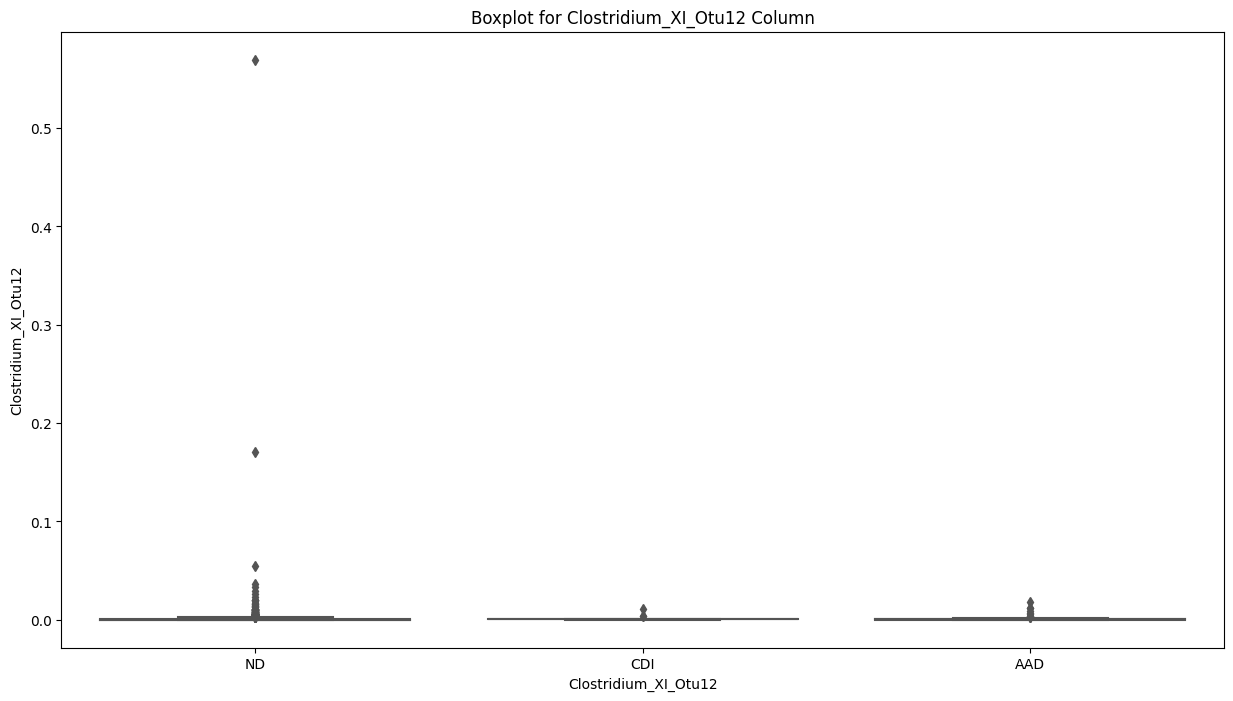

In [ ]:
#outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.boxplot(x='Class', y='Clostridium_XI_Otu12', data=sheet1, palette="muted")
plt.title('Boxplot for Clostridium_XI_Otu12 Column')
plt.xlabel('Clostridium_XI_Otu12')

plt.show()

In [ ]:

float_columns = sheet1.select_dtypes(include=['float64']).columns
selected_columns = [col for col in float_columns if sheet1[col].min() < 0]
result_df = sheet1[selected_columns]
print(result_df)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[747 rows x 0 columns]


In [ ]:
sheet1['Class'].value_counts()

ND     669
AAD     64
CDI     14
Name: Class, dtype: int64

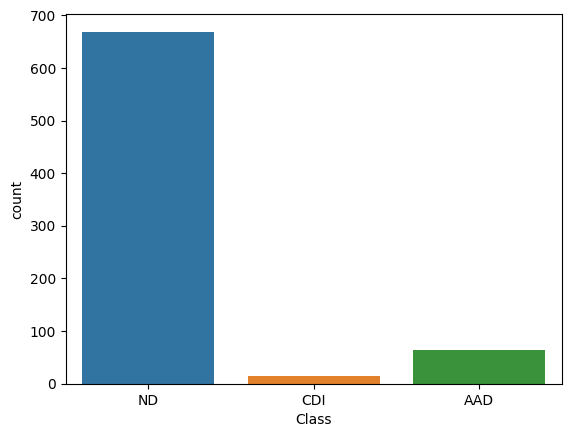

In [ ]:
sns.countplot(x='Class', data=sheet1)
plt.show()

In [ ]:
g= pd.crosstab(sheet1.Gender, sheet1.Class)
g

Class,AAD,CDI,ND
Gender,,,
F,34,5,279
M,30,9,390


In [ ]:
Crosstab= pd.crosstab(sheet1.Country, sheet1.Class)
Crosstab

Class,AAD,CDI,ND
Country,,,
France,9,0,152
Germany,21,7,80
Greece,9,1,55
Romania,5,5,139
Spain,18,1,237
TheNetherlands,2,0,6


In [ ]:
from scipy.stats import chi2_contingency
ChiSqResult= chi2_contingency(Crosstab)
print("P-value of Chi-Square test=",ChiSqResult[1])

P-value of Chi-Square test= 1.7410133734584608e-07


In [ ]:
from scipy.stats import chi2_contingency
ChiSqResult= chi2_contingency(g)
print("P-value of Chi-Square test=",ChiSqResult[1])

P-value of Chi-Square test= 0.18352660706002474


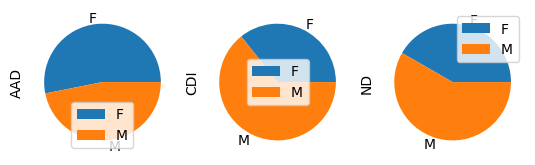

In [ ]:
pd.crosstab(sheet1.Gender, sheet1.Class).plot(kind = 'pie',subplots=True);

In [ ]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding
label_encoder = LabelEncoder()
sheet1['Class'] = label_encoder.fit_transform(sheet1['Class'])
# Create a dictionary mapping encoded values to original labels
Class_dictionary = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
sheet1['Country'] = label_encoder.fit_transform(sheet1['Country'])
Country_dictionary = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
sheet1['Gender'] = label_encoder.fit_transform(sheet1['Gender'])
Gender_dictionary = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the dictionary
print(Class_dictionary)

{'AAD': 0, 'CDI': 1, 'ND': 2}


In [ ]:
print(Country_dictionary)
print(Gender_dictionary)

{'France': 0, 'Germany': 1, 'Greece': 2, 'Romania': 3, 'Spain': 4, 'TheNetherlands': 5}
{'F': 0, 'M': 1}


In [ ]:
sheet1

,Clostridium_XI_Otu12,Klebsiella_Otu4,Staphylococcus_Otu3,Escherichia/Shigella_Otu2,Enterococcus_Otu1,Streptococcus_Otu8,Sphingomonas_Otu5,Finegoldia_Otu9,Ruminococcaceae_unclassified_Otu11,Prevotella_Otu7,...,Finegoldia_Otu20269,Finegoldia_Otu20304,Finegoldia_Otu20307,Finegoldia_Otu20311,Finegoldia_Otu20314,Acinetobacter_Otu20318,Finegoldia_Otu20320,Country,Gender,Class
0,0.000000,0.000067,0.000000,0.027667,0.000000,0.001000,0.000067,0.061267,0.000000,0.016400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000933,0.000200,0.000000,0.000600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2
2,0.000067,0.000000,0.000000,0.001000,0.000000,0.000067,0.000000,0.024000,0.000133,0.126333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000133,0.000000,0.047400,0.000067,0.001333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2
4,0.000000,0.000000,0.001000,0.000067,0.000000,0.000000,0.000000,0.036467,0.000000,0.000067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.000000,0.000000,0.000000,0.295733,0.010533,0.000000,0.000800,0.354667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2
743,0.000133,0.000000,0.000333,0.000000,0.000267,0.000933,0.000000,0.066400,0.007333,0.000133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2
744,0.000000,0.000000,0.000000,0.018867,0.000133,0.000133,0.000000,0.037333,0.000000,0.001200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2
745,0.000000,0.005867,0.000000,0.003733,0.000333,0.000600,0.000800,0.091533,0.004533,0.000133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [ ]:
# Define the quantile threshold (e.g., 75%)
quantile_threshold = 0.75

# Calculate the variance of each feature
variances = sheet1.var()

# Identify features with variances below the quantile threshold
low_variance_features = variances[variances < np.quantile(variances, quantile_threshold)].index

# Drop low variance features from the DataFrame
df = sheet1.drop(columns=low_variance_features)

# Display the resulting DataFrame
print("Original DataFrame:")
print(sheet1.shape)

print("\nDataFrame after dropping low variance features:")
print(df.shape)

Original DataFrame:
(747, 5917)

DataFrame after dropping low variance features:
(747, 1480)


In [ ]:
# Training data
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
# Solving imbalanced data problem using class weights
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

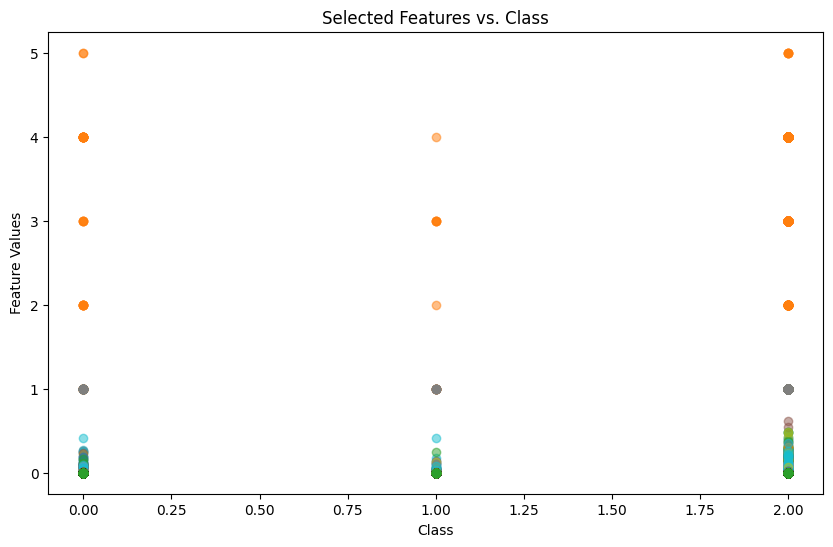

In [ ]:
# Select a random sample of 30% of features for x-axis
sample_size = int(0.3 * len(X.columns))
x_features = np.random.choice(X.columns, size=sample_size, replace=False)

# Create a single plot for all selected features
plt.figure(figsize=(10, 6))

# Plot each feature against the target column
for feature in x_features:
    plt.scatter(y, X[feature], alpha=0.5, label=feature)

plt.title('Selected Features vs. Class')
plt.xlabel('Class')
plt.ylabel('Feature Values')
plt.show()

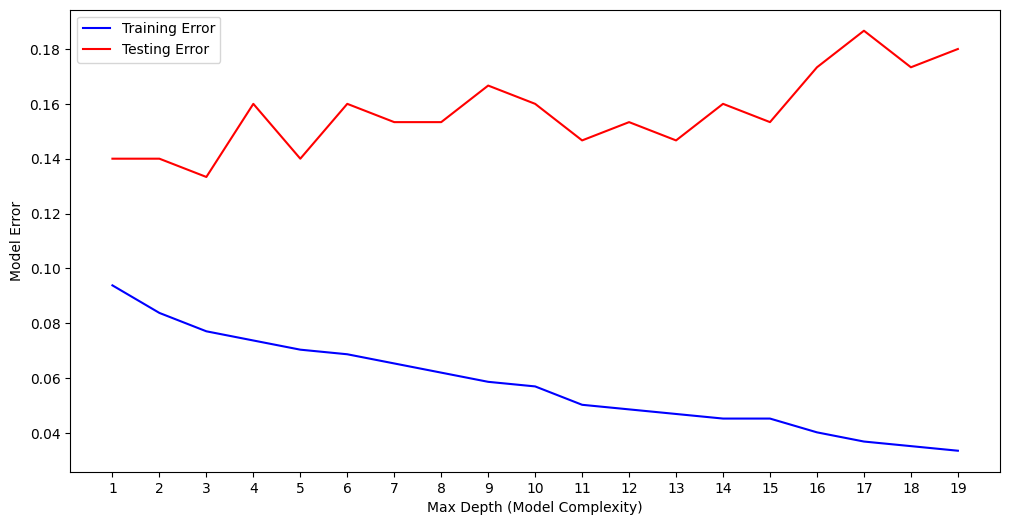

In [ ]:
# Initialize lists to store the results
train_results = []
test_results = []
max_depths = range(1, 20)

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Append the results
    train_results.append(1- model.score(X_train, y_train))
    test_results.append(1- model.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(max_depths, train_results, 'b', label='Training Error')
plt.plot(max_depths, test_results, 'r', label='Testing Error')
plt.xlabel('Max Depth (Model Complexity)')
plt.ylabel('Model Error')
plt.legend()

# Set x-axis ticks with integer values
plt.xticks(max_depths)

plt.show()

In [ ]:
class_labels = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)
class_weight_dict = {class_label: weight for class_label, weight in zip(class_labels, class_weights)}
# Increase the weight of the last two classes (adjust as needed)
class_weight_dict[1] *= 2
class_weight_dict[2] *= 2
print(f"Weight of First Class = {class_weight_dict[0]} and Weight of Second Class = {class_weight_dict[1]} and Weight of Third Class = {class_weight_dict[2]}")

model= DecisionTreeClassifier(max_depth= 5, class_weight=class_weight_dict)
model.fit(X_train, y_train)
y_predict= model.predict(X_test)

print("Training Accuracy=",accuracy_score(y_train, model.predict(X_train)))
print("Testing Accuracy=", accuracy_score(y_test, y_predict))

Weight of First Class = 3.98 and Weight of Second Class = 44.22222222222222 and Weight of Third Class = 0.7397769516728625
Training Accuracy= 0.9212730318257957
Testing Accuracy= 0.8133333333333334


In [ ]:
print(classification_report(y_test, y_predict, zero_division=1))

              precision    recall  f1-score   support

           0       0.10      0.07      0.08        14
           1       0.33      0.20      0.25         5
           2       0.88      0.92      0.90       131

    accuracy                           0.82       150
   macro avg       0.44      0.40      0.41       150
weighted avg       0.79      0.82      0.80       150



**Showing differences between entropy and gini index in parameter selection**

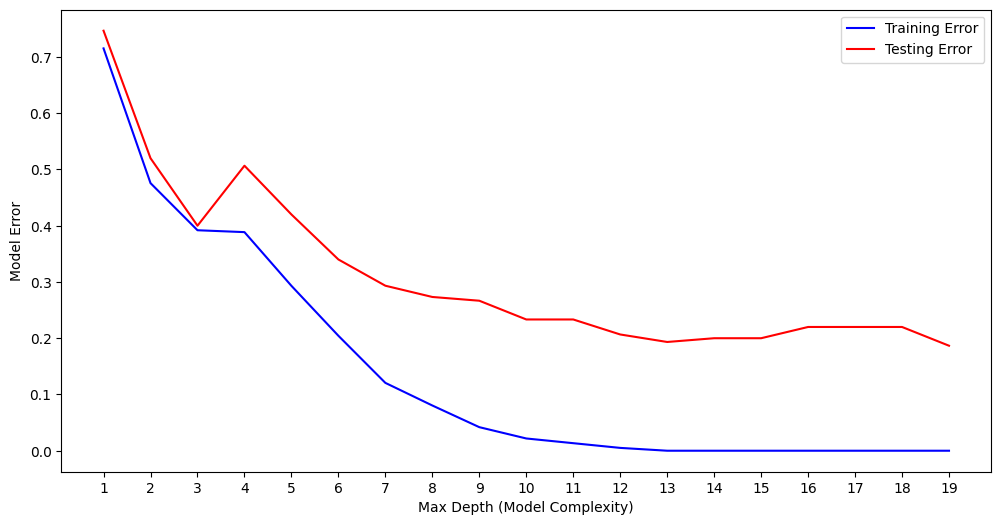

In [ ]:
# Initialize lists to store the results
train_results = []
test_results = []
max_depths = range(1, 20)

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, class_weight=class_weight_dict, criterion='entropy')

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Append the results
    train_results.append(1- model.score(X_train, y_train))
    test_results.append(1- model.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(max_depths, train_results, 'b', label='Training Error')
plt.plot(max_depths, test_results, 'r', label='Testing Error')
plt.xlabel('Max Depth (Model Complexity)')
plt.ylabel('Model Error')
plt.legend()

# Set x-axis ticks with integer values
plt.xticks(max_depths)

plt.show()

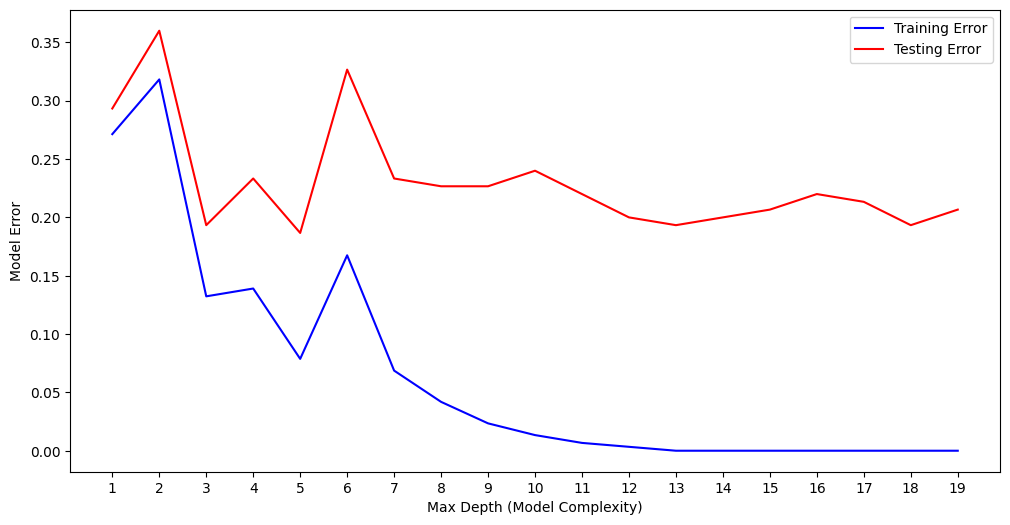

In [ ]:
# Initialize lists to store the results
train_results = []
test_results = []
max_depths = range(1, 20)

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, class_weight=class_weight_dict)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Append the results
    train_results.append(1- model.score(X_train, y_train))
    test_results.append(1- model.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(max_depths, train_results, 'b', label='Training Error')
plt.plot(max_depths, test_results, 'r', label='Testing Error')
plt.xlabel('Max Depth (Model Complexity)')
plt.ylabel('Model Error')
plt.legend()

# Set x-axis ticks with integer values
plt.xticks(max_depths)

plt.show()

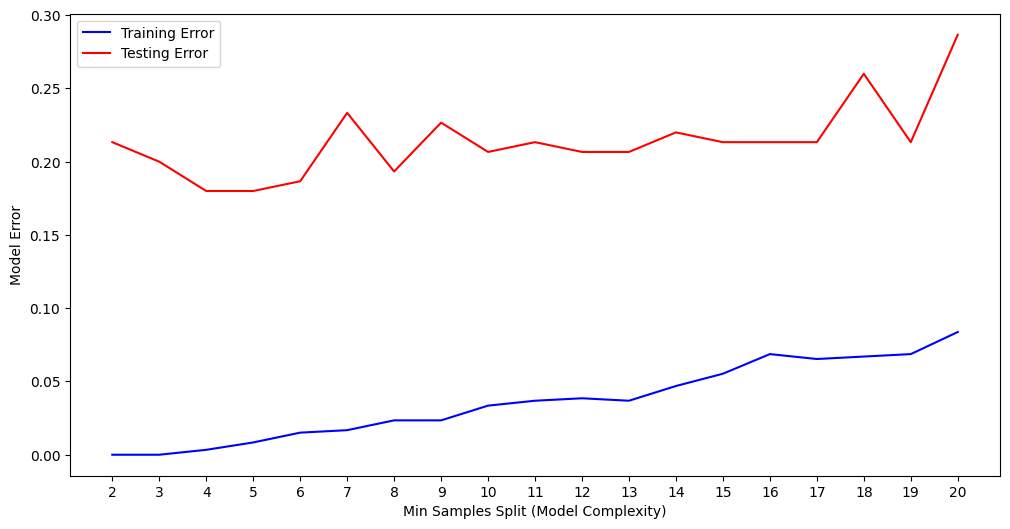

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have your features (X) and labels (y) ready
# Make sure to replace X and y with your actual data

# Initialize lists to store the results
train_results = []
test_results = []
min_samples_splits = range(2, 21)  # You can adjust this range based on your needs

for min_samples_split in min_samples_splits:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split, class_weight=class_weight_dict, criterion='entropy')

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Append the results
    train_results.append(1 - model.score(X_train, y_train))
    test_results.append(1 - model.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(min_samples_splits, train_results, 'b', label='Training Error')
plt.plot(min_samples_splits, test_results, 'r', label='Testing Error')
plt.xlabel('Min Samples Split (Model Complexity)')
plt.ylabel('Model Error')
plt.legend()

# Set x-axis ticks with integer values
plt.xticks(min_samples_splits)

plt.show()


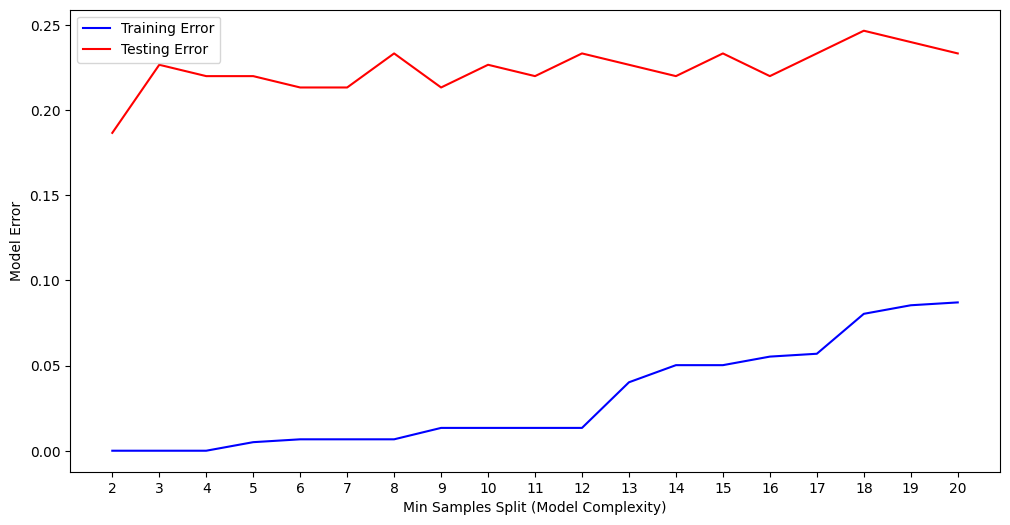

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have your features (X) and labels (y) ready
# Make sure to replace X and y with your actual data

# Initialize lists to store the results
train_results = []
test_results = []
min_samples_splits = range(2, 21)  # You can adjust this range based on your needs

for min_samples_split in min_samples_splits:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split, class_weight=class_weight_dict)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Append the results
    train_results.append(1 - model.score(X_train, y_train))
    test_results.append(1 - model.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(min_samples_splits, train_results, 'b', label='Training Error')
plt.plot(min_samples_splits, test_results, 'r', label='Testing Error')
plt.xlabel('Min Samples Split (Model Complexity)')
plt.ylabel('Model Error')
plt.legend()

# Set x-axis ticks with integer values
plt.xticks(min_samples_splits)

plt.show()


**Gini impurity is computationally effecient**

In [ ]:
DTC2= DecisionTreeClassifier(max_depth= 3, class_weight=class_weight_dict, criterion='entropy')
DTC2.fit(X_train, y_train)

# Predict the values
y_predict= DTC2.predict(X_test)

print("Training Accuracy=",accuracy_score(y_train, DTC2.predict(X_train)))
print("Testing Accuracy=", accuracy_score(y_test, y_predict))

Training Accuracy= 0.6080402010050251
Testing Accuracy= 0.5866666666666667


In [ ]:
DTC= DecisionTreeClassifier(max_depth= 3, class_weight=class_weight_dict)
DTC.fit(X_train, y_train)

# Predict the values
y_predict= DTC.predict(X_test)

print("Training Accuracy=",accuracy_score(y_train, DTC.predict(X_train)))
print("Testing Accuracy=", accuracy_score(y_test, y_predict))

Training Accuracy= 0.8676716917922948
Testing Accuracy= 0.8066666666666666


[Text(0.5, 0.875, 'x[80] <= 0.0\ngini = 0.63\nsamples = 747\nvalue = [254.72, 619.111, 494.911]'),
 Text(0.25, 0.625, 'x[12] <= 0.001\ngini = 0.471\nsamples = 223\nvalue = [55.72, 442.222, 147.216]'),
 Text(0.125, 0.375, 'x[806] <= 0.0\ngini = 0.43\nsamples = 77\nvalue = [23.88, 0.0, 52.524]'),
 Text(0.0625, 0.125, 'gini = 0.357\nsamples = 75\nvalue = [15.92, 0.0, 52.524]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [7.96, 0.0, 0.0]'),
 Text(0.375, 0.375, 'x[49] <= 0.001\ngini = 0.365\nsamples = 146\nvalue = [31.84, 442.222, 94.691]'),
 Text(0.3125, 0.125, 'gini = 0.285\nsamples = 96\nvalue = [27.86, 442.222, 58.442]'),
 Text(0.4375, 0.125, 'gini = 0.178\nsamples = 50\nvalue = [3.98, 0.0, 36.249]'),
 Text(0.75, 0.625, 'x[112] <= 0.004\ngini = 0.634\nsamples = 524\nvalue = [199.0, 176.889, 347.695]'),
 Text(0.625, 0.375, 'x[596] <= 0.001\ngini = 0.468\nsamples = 402\nvalue = [159.2, 0.0, 267.799]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 389\nvalue = [131.34, 0.0, 26

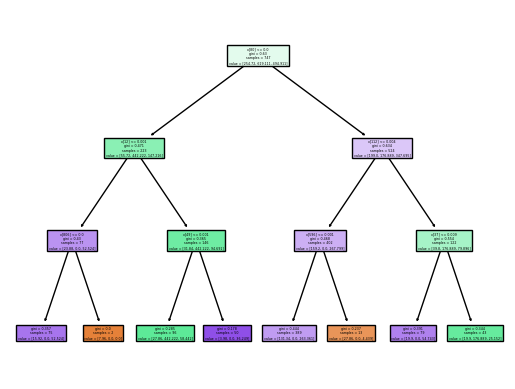

In [ ]:
tree.plot_tree(DTC, filled=True)

In [ ]:
from sklearn.tree import export_text

# Display the splitting mechanism
tree_rules = export_text(DTC, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- Clostridium_XlVa_Otu146 <= 0.00
|   |--- Bacteroides_Otu113 <= 0.00
|   |   |--- Clostridiales_unclassified_Otu520 <= 0.00
|   |   |   |--- class: 2
|   |   |--- Clostridiales_unclassified_Otu520 >  0.00
|   |   |   |--- class: 0
|   |--- Bacteroides_Otu113 >  0.00
|   |   |--- Dorea_Otu163 <= 0.00
|   |   |   |--- class: 1
|   |   |--- Dorea_Otu163 >  0.00
|   |   |   |--- class: 2
|--- Clostridium_XlVa_Otu146 >  0.00
|   |--- Erysipelotrichaceae_unclassified_Otu167 <= 0.00
|   |   |--- Clostridium_XlVa_Otu16409 <= 0.00
|   |   |   |--- class: 2
|   |   |--- Clostridium_XlVa_Otu16409 >  0.00
|   |   |   |--- class: 1
|   |--- Erysipelotrichaceae_unclassified_Otu167 >  0.00
|   |   |--- Ruminococcus_Otu166 <= 0.00
|   |   |   |--- class: 2
|   |   |--- Ruminococcus_Otu166 >  0.00
|   |   |   |--- class: 0



In [ ]:
print(classification_report(y_test, y_predict, zero_division=1))

              precision    recall  f1-score   support

           0       0.25      0.07      0.11        14
           1       0.15      0.40      0.22         5
           2       0.89      0.90      0.89       131

    accuracy                           0.81       150
   macro avg       0.43      0.46      0.41       150
weighted avg       0.80      0.81      0.80       150



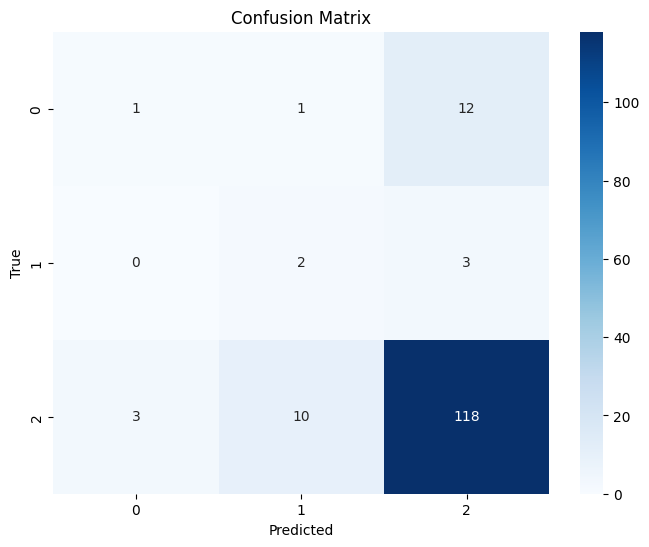

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming y_test and y_predict are your true labels and predicted labels

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_predict_bin = label_binarize(y_predict, classes=np.unique(y_test))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_predict_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-class')
plt.legend(loc='lower right')
plt.show()


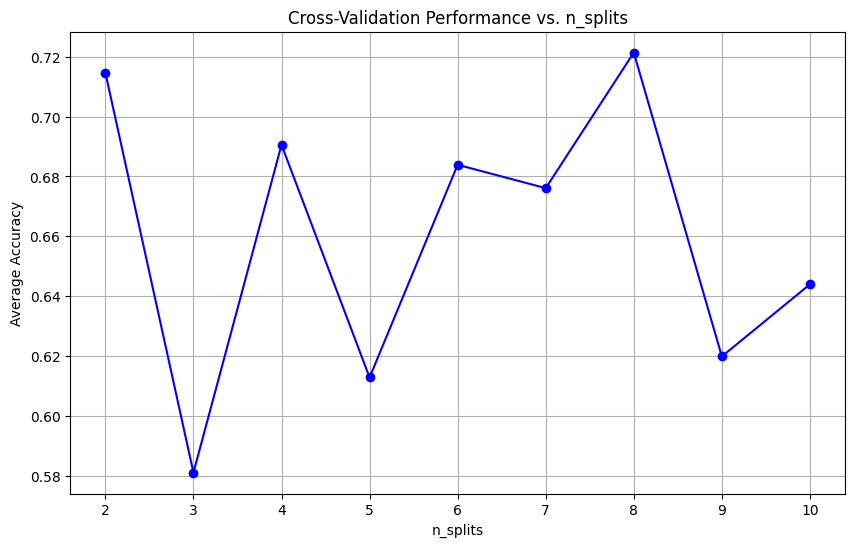


The best n_splits is 8 with an average accuracy of 0.7214


Classification Report for the best n_splits (8):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.87      0.77      0.82        84

    accuracy                           0.69        94
   macro avg       0.29      0.26      0.27        94
weighted avg       0.77      0.69      0.73        94



In [ ]:
# Assuming you have your features (X) and labels (y) ready as a DataFrame
# You can reset the index and convert to NumPy array for compatibility
X_array = X.reset_index(drop=True).values
y_array = y.values

# Define a range of n_splits values to try
n_splits_values = range(2, 11)  # You can adjust this range based on your needs

# Initialize a list to store the results
cv_results = []

# Iterate over different n_splits values
for n_splits in n_splits_values:
    # Initialize the StratifiedKFold cross-validator
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize a list to store the accuracy scores for each fold
    fold_scores = []

    # Iterate over the folds
    for train_index, test_index in skf.split(X_array, y_array):
        X_train, X_test = X_array[train_index], X_array[test_index]
        y_train, y_test = y_array[train_index], y_array[test_index]

        # Initialize and train your model (DecisionTreeClassifier in this example)
        model = DecisionTreeClassifier(max_depth= 3, class_weight=class_weight_dict)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy and store the result
        accuracy = accuracy_score(y_test, y_pred)
        fold_scores.append(accuracy)

    # Calculate the average accuracy for this n_splits value
    avg_accuracy = np.mean(fold_scores)

    # Store the result
    cv_results.append((n_splits, avg_accuracy))

n_splits_values, avg_accuracies = zip(*cv_results)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_splits_values, avg_accuracies, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Performance vs. n_splits')
plt.xlabel('n_splits')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

# Find the best n_splits based on the highest average accuracy
best_n_splits, best_accuracy = max(cv_results, key=lambda x: x[1])

print(f"\nThe best n_splits is {best_n_splits} with an average accuracy of {best_accuracy:.4f}")

best_skf = StratifiedKFold(n_splits=best_n_splits, shuffle=True, random_state=42)
for train_index, test_index in best_skf.split(X_array, y_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    # Initialize and train your model (DecisionTreeClassifier in this example)
    model = DecisionTreeClassifier(max_depth=3, class_weight=class_weight_dict)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print the classification report
    report = classification_report(y_test, y_pred)
    break

print(f"\n\nClassification Report for the best n_splits ({best_n_splits}):")
print(report)

In [ ]:
cv_scores = []
for x in range(2, 14):
    cv = cross_val_score(DTC, X, y ,cv=x)
    cv_scores.append(np.mean(cv))
    print(f"Accuracy {x} on Test Set: {np.mean(cv)}")

Accuracy 2 on Test Set: 0.7176850511103783
Accuracy 3 on Test Set: 0.7443105756358769
Accuracy 4 on Test Set: 0.6842188488298544
Accuracy 5 on Test Set: 0.7630067114093959
Accuracy 6 on Test Set: 0.5863010752688173
Accuracy 7 on Test Set: 0.6343930271808953
Accuracy 8 on Test Set: 0.5997197437657287
Accuracy 9 on Test Set: 0.6907630522088355
Accuracy 10 on Test Set: 0.5567567567567568
Accuracy 11 on Test Set: 0.6128781227552079
Accuracy 12 on Test Set: 0.6048813790749274
Accuracy 13 on Test Set: 0.5655218949229839


In [ ]:
best_cv_index = np.argmax(cv_scores) + 2  # Adding 2 because range starts from 2
best_cv = best_cv_index

print(f"Best number of folds: {best_cv}")

Best number of folds: 5


In [ ]:
from sklearn.model_selection import cross_val_predict

best_model = DTC  # Replace with your model
best_cv_result = cross_val_score(best_model, X, y, cv=best_cv)
best_model.fit(X, y)  # Fit on the entire dataset

y_pred = cross_val_predict(best_model, X, y, cv=best_cv)
print("Testing accuracy=", accuracy_score(y, y_pred))
print("\n",classification_report(y, y_pred, zero_division=1))

Testing accuracy= 0.7617135207496654

               precision    recall  f1-score   support

           0       0.11      0.03      0.05        64
           1       0.02      0.14      0.04        14
           2       0.90      0.84      0.87       669

    accuracy                           0.76       747
   macro avg       0.34      0.34      0.32       747
weighted avg       0.82      0.76      0.79       747



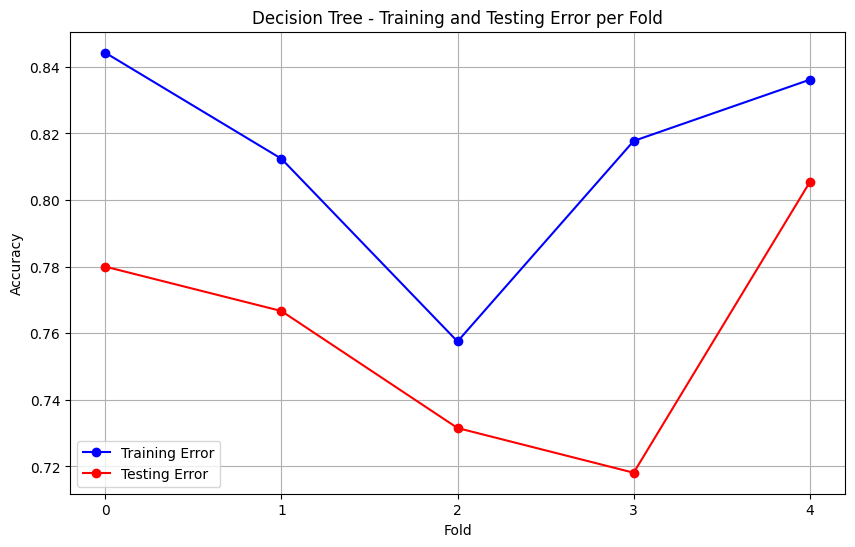

In [ ]:
from sklearn.model_selection import cross_validate

# Perform 10-fold cross-validation

cv_results = cross_validate(DTC, X, y, cv=5, return_train_score=True)

# Extracting train and test scores

train_scores = cv_results['train_score']

test_scores = cv_results['test_score']

# Plotting the results

plt.figure(figsize=(10, 6))

plt.plot(train_scores, label='Training Error', color='blue', marker='o')

plt.plot(test_scores, label='Testing Error', color='red', marker='o')

plt.title('Decision Tree - Training and Testing Error per Fold')

plt.xlabel('Fold')
plt.xticks(range(0,5))

plt.ylabel('Accuracy')

plt.legend()

plt.grid(True)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Assuming you have your features (X) and labels (y) ready
# No need to check for DataFrame or use .values if X is already a NumPy array
X_array = X
y_array = y

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['entropy', 'gini']
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(class_weight=class_weight_dict)

# Initialize the StratifiedKFold cross-validator
stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Initialize GridSearchCV with the Decision Tree classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring='accuracy', cv=stratified_kfold)

# Perform the grid search on your data
grid_search.fit(X_array, y_array)

# Extract the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model using cross-validation predictions
y_pred = cross_val_predict(best_model, X_array, y_array, cv=stratified_kfold)

# Calculate accuracy
accuracy = accuracy_score(y_array, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_array, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_array, y_pred, zero_division=1))

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Accuracy: 0.7483

Confusion Matrix:
[[  5   3  56]
 [  3   1  10]
 [ 96  20 553]]

Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.08      0.06        64
           1       0.04      0.07      0.05        14
           2       0.89      0.83      0.86       669

    accuracy                           0.75       747
   macro avg       0.33      0.33      0.32       747
weighted avg       0.80      0.75      0.78       747



In [ ]:
model= DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 1, min_samples_split= 5)
model.fit(X_train, y_train)

# Predict the values
y_predict= model.predict(X_test)

print("Training Accuracy=",accuracy_score(y_train, model.predict(X_train)))
print("Testing Accuracy=", accuracy_score(y_test, y_predict))

Training Accuracy= 0.9363484087102177
Testing Accuracy= 0.8333333333333334


In [ ]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense

ann_model = KerasClassifier(build_fn=model2, epochs=10, batch_size=32, verbose=0)

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('lr', logreg),
    ('dt', DTC),
    ('ann', ann_model)
], voting='hard')

# Train the ensemble model
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred = voting_classifier.predict(X_test)

# Evaluate the performance
training_accuracy = accuracy_score(y_train, voting_classifier.predict(X_train))
print(f'Ensemble Training Accuracy: {training_accuracy}')
testing_accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Testing Accuracy: {testing_accuracy}')


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7a90ad185360>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7a90ad185360>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Ensemble Training Accuracy: 0.9882747068676717
Ensemble Testing Accuracy: 0.8666666666666667
